<a href="https://colab.research.google.com/github/ppiont/cnn-soc-wagga/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install python3-rtree

In [5]:
%cd /usr/local/lib/python3.6/dist-packages/ideep4py/lib

/usr/local/lib/python3.6/dist-packages/ideep4py/lib


In [10]:
%ls -lha libmkldnn*

-rwxr-xr-x 1 root staff 6.7M Apr 20 16:14 libmkldnn.so.0*
-rwxr-xr-x 1 root staff 6.7M Apr 20 16:14 libmkldnn.so.0.14.0*


In [ ]:
!sudo rm libmkldnn.so.0
#!sudo rm libmkldnn.so

In [ ]:
!ldconfig

In [13]:
!pip install geopandas

     |████████████████████████████████| 931kB 4.6MB/s 
     |████████████████████████████████| 14.7MB 304kB/s 
     |████████████████████████████████| 10.4MB 21.0MB/s 


In [14]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT, force_remount=True)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
%cd "/content/drive/My Drive/Thesis/cnn-soc-wagga"

/content/drive/My Drive/Thesis/cnn-soc-wagga


In [ ]:
import pandas as pd
df = pd.read_csv("data/LUCAS_TOPSOIL_v1.csv")

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.GPS_LONG, df.GPS_LAT), crs = "EPSG:4326")

In [19]:
gdf.head()

,POINT_ID,coarse,clay,silt,sand,pH_in_H2O,pH_in_CaCl2,OC,CaCO3,N,P,K,CEC,Notes,sample_ID,GPS_LAT,GPS_LONG,geometry
0,NE,25,17.0,39.0,43.0,7.98,7.37,21.5,776.0,1.7,182.0,571.0,14.7,NaN,31035,34.68,32.69,POINT (32.69000 34.68000)
1,NE,28,25.0,41.0,34.0,8.26,7.54,26.7,611.0,1.6,5.0,148.0,23.4,NaN,31044,34.69,32.90,POINT (32.90000 34.69000)
2,NE,19,30.0,48.0,22.0,8.22,7.48,28.5,588.0,2.7,5.0,249.0,28.2,NaN,31034,34.69,32.67,POINT (32.67000 34.69000)
3,NE,20,23.0,50.0,27.0,8.34,7.47,19.6,655.0,1.1,5.0,299.0,18.2,NaN,31036,34.71,32.74,POINT (32.74000 34.71000)
4,NE,17,29.0,39.0,32.0,8.06,7.46,18.3,499.0,1.3,15.0,225.0,23.4,NaN,31021,34.71,32.59,POINT (32.59000 34.71000)


In [ ]:
plt.rcParams['figure.figsize'] = 20,20

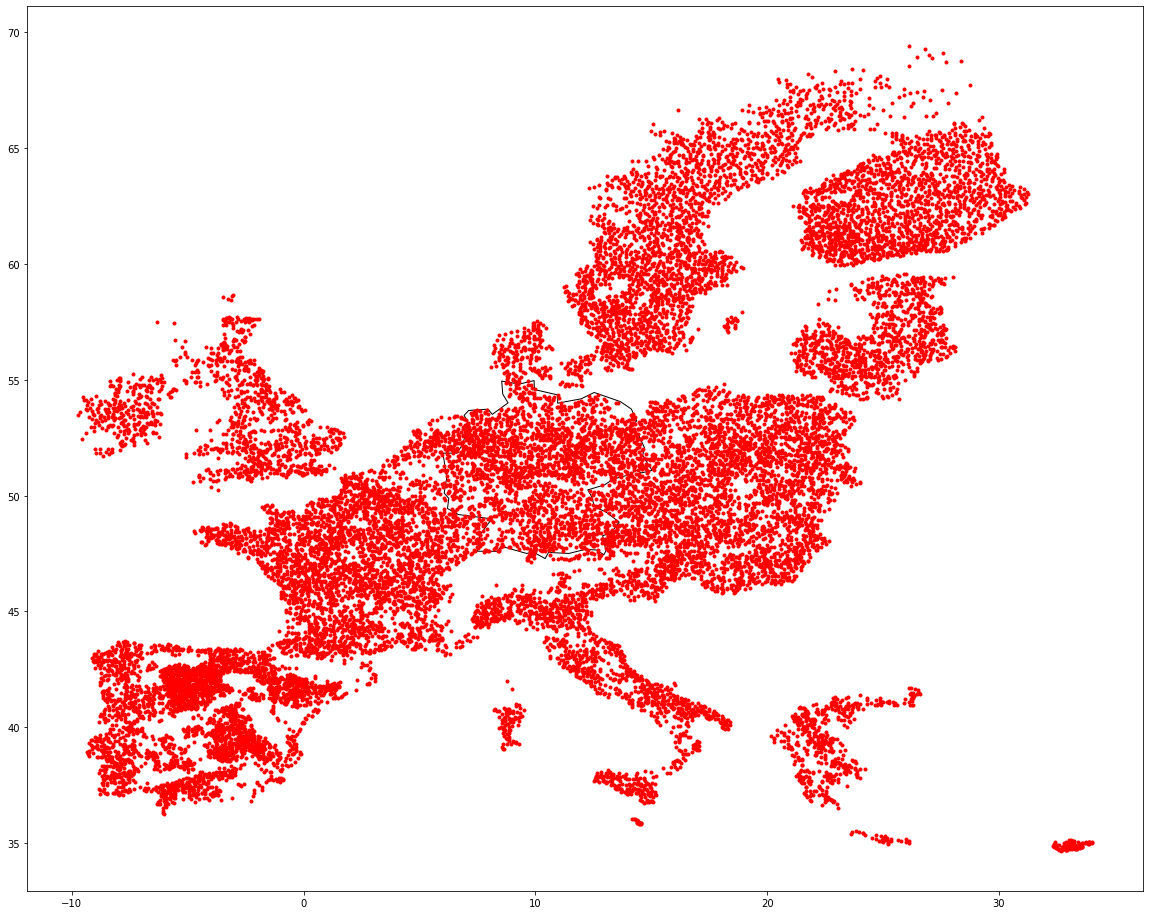

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict geographically
ax = world[world.name == 'Germany'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, marker = '.', color='red')
plt.show()

In [ ]:
germany = world[world.name == 'Germany']

In [ ]:
from geopandas.tools import sjoin

targets = sjoin(gdf, germany)

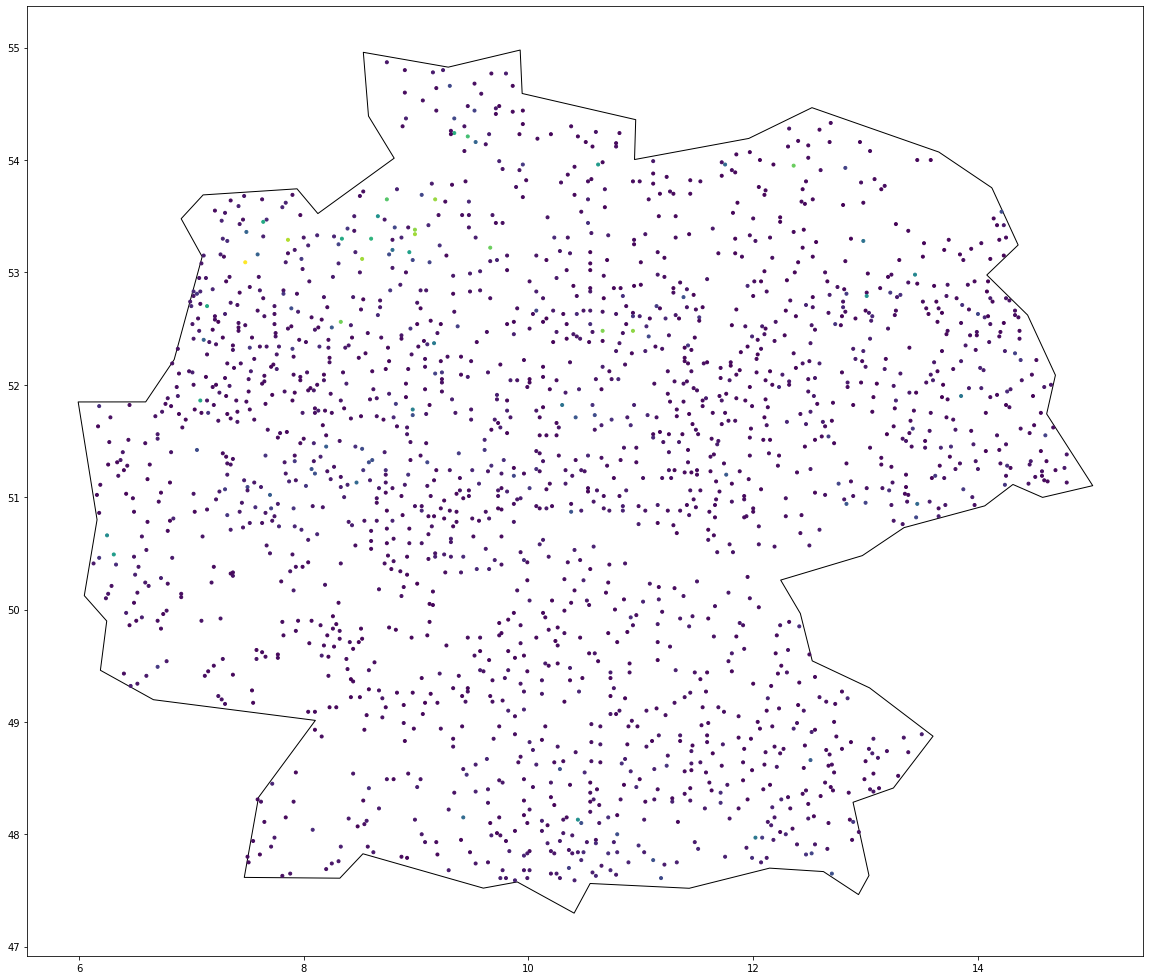

In [24]:
# We restrict to Germany
ax = world[world.name == "Germany"].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
targets.plot(ax=ax, marker = '.', column = "OC")
plt.show()

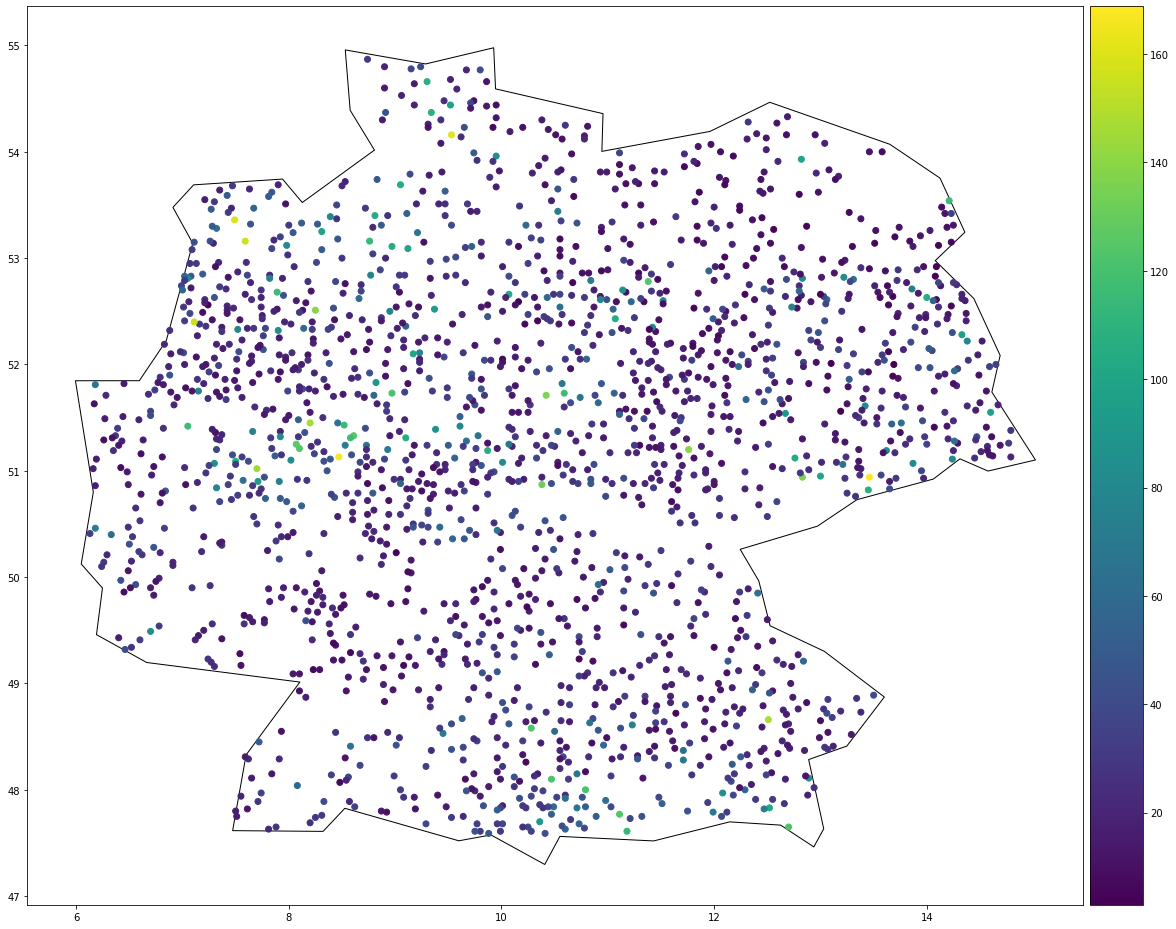

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = world[world.name == "Germany"].plot(
    color='white', edgecolor='black')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

targets[(targets.OC < (targets.OC.mean() + targets.OC.std() * 3)) & (targets.OC > (targets.OC.mean() - targets.OC.std() * 3))].plot(column='OC', ax=ax, legend=True, cax=cax)

In [ ]:
targets_fix = targets.drop(labels= ["index_right", "pop_est", "continent", "name", "iso_a3", "gdp_md_est"], axis = 1)

In [ ]:
targets_fix.to_csv("data/germany_targets.csv")